In [6]:
import osmnx as ox
import networkx as nx 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pickle

In [2]:
point = (-0.206412, -78.499363)

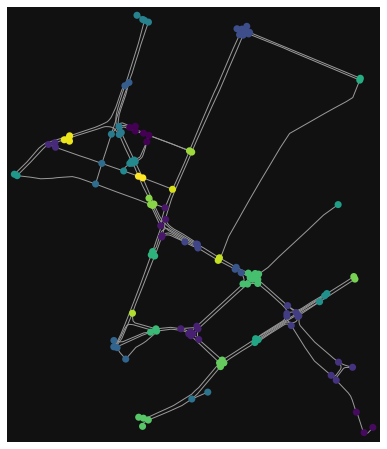

In [3]:
num_clusters = 35
point = (-0.206412, -78.499363)
filtro = '["highway"~"primary|secondary|tertiary"]'
graph = ox.graph_from_point(point, dist=1000, simplify=True, custom_filter=filtro)
g_nodes = list(graph.nodes)
positions = {}
for node_name in g_nodes:
    positions[node_name] = (graph.nodes[node_name]['x'],graph.nodes[node_name]['y'])
positions_x = nx.get_node_attributes(graph,'x')
positions_y = nx.get_node_attributes(graph,'y')
positions_for_data={'nodos':g_nodes,
    'position_x':positions_x.values(),
    'position_y':positions_y.values()}
data = pd.DataFrame.from_dict(positions_for_data)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['position_x','position_y']])
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
colors_num = cluster.fit_predict(data_scaled)

fig, ax = ox.plot_graph(graph,
    node_color=colors_num,
    node_size=50)

plt.show()



In [4]:
colors_num

array([ 0,  0, 29, 21, 21, 13, 14, 12, 12,  4,  3, 26, 26, 26,  3,  3,  3,
       32,  2,  2, 31,  9, 24, 24, 24, 16, 16, 16, 14, 28,  2, 31, 14, 34,
       28, 17, 34, 17, 20,  6, 17, 14, 10, 15, 15, 18, 33, 30, 23, 23, 11,
       11, 11, 26, 13,  7, 22,  5,  5, 25,  6, 18, 29, 11, 15,  5,  5, 24,
        3, 20, 24,  9, 24, 24, 24, 24, 24, 24,  3, 25, 27,  1,  9,  0, 16,
       16, 16,  2,  7,  7, 33, 33, 33,  8,  8,  8,  8,  8,  8,  0,  0,  8,
        8,  8,  8, 27, 15,  0,  4,  4, 28, 28, 19,  3,  3, 20, 25, 25,  1,
        1,  6,  6,  7, 23, 22, 22,  2, 10,  6,  6,  6], dtype=int64)

Guardo el modelo del mapa OSMNX.

In [7]:
a = graph
with open('Mapa_OSMNX.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

Todos los nodos que pertenezcan al mismo clúster forman un grupo y hay que sacar el centro de esos puntos.

In [218]:
data

,nodos,position_x,position_y
0,264268562,-78.500598,-0.202221
1,264268564,-78.500014,-0.202610
2,264268569,-78.498284,-0.203269
3,264270346,-78.490999,-0.200246
4,264270354,-78.490973,-0.200167
...,...,...,...
126,5183570478,-78.499472,-0.206960
127,6325538189,-78.501044,-0.200487
128,7009132784,-78.493927,-0.210743
129,7009133900,-78.493726,-0.210191


In [219]:
len(colors_num)

131

In [243]:
data['cluster']=colors_num

In [221]:
order_data = data.sort_values(by='cluster')

In [222]:
order_data

,nodos,position_x,position_y,cluster
0,264268562,-78.500598,-0.202221,0
83,3069687543,-78.500106,-0.202884,0
100,3726295028,-78.500600,-0.202422,0
107,4207542600,-78.500251,-0.202517,0
99,3726294618,-78.500839,-0.202274,0
...,...,...,...,...
91,3671809622,-78.503441,-0.202736,33
92,3671809623,-78.503415,-0.202858,33
46,267966887,-78.503639,-0.202798,33
36,267939918,-78.500465,-0.204358,34


In [240]:
data['centro_x'] = 0

In [241]:
data['centro_y'] = 0

In [242]:
data

,nodos,position_x,position_y,centro_x,centro_y
0,264268562,-78.500598,-0.202221,0,0
1,264268564,-78.500014,-0.202610,0,0
2,264268569,-78.498284,-0.203269,0,0
3,264270346,-78.490999,-0.200246,0,0
4,264270354,-78.490973,-0.200167,0,0
...,...,...,...,...,...
126,5183570478,-78.499472,-0.206960,0,0
127,6325538189,-78.501044,-0.200487,0,0
128,7009132784,-78.493927,-0.210743,0,0
129,7009133900,-78.493726,-0.210191,0,0


In [244]:
centros = []
for cluster in range(max(colors_num)+1):
    indices = np.where(data['cluster']==cluster)
    grupo = data.iloc[indices]
    centro_x = grupo['position_x'].mean()
    centro_y = grupo['position_y'].mean()
    for indice in indices:
        data.at[indice,'centro_x']=centro_x
        data.at[indice,'centro_y']=centro_y
        
    centros.append((centro_x,centro_y))
        

In [234]:
indices = np.where(data['cluster']==cluster)
grupo = data.iloc[indices]

In [245]:
data


,nodos,position_x,position_y,centro_x,centro_y,cluster
0,264268562,-78.500598,-0.202221,-78.500401,-0.202488,0
1,264268564,-78.500014,-0.202610,-78.500401,-0.202488,0
2,264268569,-78.498284,-0.203269,-78.498235,-0.203297,29
3,264270346,-78.490999,-0.200246,-78.490986,-0.200207,21
4,264270354,-78.490973,-0.200167,-78.490986,-0.200207,21
...,...,...,...,...,...,...
126,5183570478,-78.499472,-0.206960,-78.499413,-0.206449,2
127,6325538189,-78.501044,-0.200487,-78.500957,-0.200418,10
128,7009132784,-78.493927,-0.210743,-78.493888,-0.210300,6
129,7009133900,-78.493726,-0.210191,-78.493888,-0.210300,6


In [161]:
graph.nodes[264268562]

{'y': -0.2022214, 'x': -78.5005984, 'street_count': 4}

In [128]:
graph.add_node(7009134036)

In [127]:
np.max(g_nodes)

7009134035

In [130]:
graph.nodes[7009134036]['x']=-13.083400

In [131]:
graph.nodes[7009134036]['y']=-0.033748

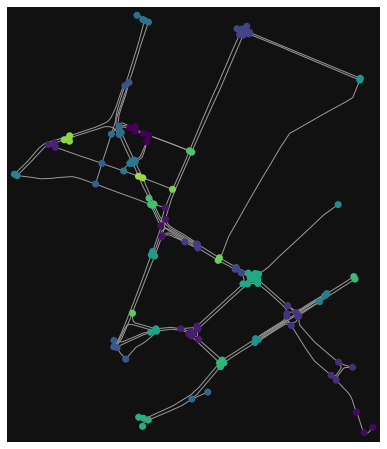

In [151]:
fig, ax = ox.plot_graph(graph,
    node_color=colors_num_2,
    node_size=50)

In [141]:
colors_num_2 = np.append(colors_num,64)

In [147]:
max(colors_num)

34

In [146]:
max(colors_num_2)

64

In [150]:
colors_num_2[131]=40

Agregar los centros al mapa

In [246]:
inicio_nodos = max(g_nodes)+1

In [247]:
idx = inicio_nodos
colores_centros = []
for centro in centros:
    graph.add_node(idx)
    graph.nodes[idx]['x']=centro[0]
    graph.nodes[idx]['y']=centro[1]
    colores_centros.append(40)
    idx+=1

In [248]:
len(graph.nodes)

166

In [249]:
colors_num_2 = np.append(colors_num,colores_centros)

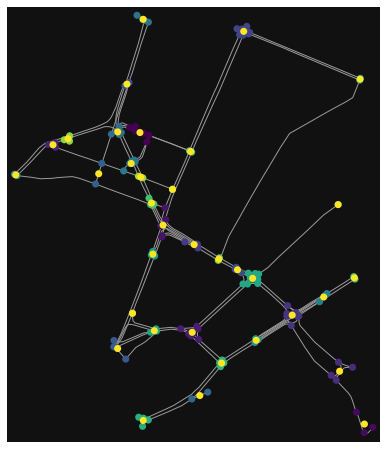

In [250]:
fig, ax = ox.plot_graph(graph,
    node_color=colors_num_2,
    node_size=50)

In [251]:
data

,nodos,position_x,position_y,centro_x,centro_y,cluster
0,264268562,-78.500598,-0.202221,-78.500401,-0.202488,0
1,264268564,-78.500014,-0.202610,-78.500401,-0.202488,0
2,264268569,-78.498284,-0.203269,-78.498235,-0.203297,29
3,264270346,-78.490999,-0.200246,-78.490986,-0.200207,21
4,264270354,-78.490973,-0.200167,-78.490986,-0.200207,21
...,...,...,...,...,...,...
126,5183570478,-78.499472,-0.206960,-78.499413,-0.206449,2
127,6325538189,-78.501044,-0.200487,-78.500957,-0.200418,10
128,7009132784,-78.493927,-0.210743,-78.493888,-0.210300,6
129,7009133900,-78.493726,-0.210191,-78.493888,-0.210300,6


In [252]:
centros

[(-78.50040125, -0.20248826666666667),
 (-78.49079993333334, -0.21495733333333333),
 (-78.49941296, -0.20644891999999998),
 (-78.4981667125, -0.21103442500000003),
 (-78.50411983333333, -0.20301313333333335),
 (-78.491860325, -0.2126993),
 (-78.49388817142858, -0.21029951428571433),
 (-78.498081775, -0.20728062500000002),
 (-78.49596283, -0.19816061999999998),
 (-78.49622876666668, -0.2083583),
 (-78.50095725, -0.20041799999999999),
 (-78.5013562, -0.211726575),
 (-78.5021648, -0.2042497),
 (-78.4978411, -0.21373910000000002),
 (-78.5013519, -0.20246205),
 (-78.50026352500001, -0.197645025),
 (-78.5007766, -0.20381238333333332),
 (-78.49254119999999, -0.20952433333333334),
 (-78.50571395, -0.20430165),
 (-78.4919239, -0.20557),
 (-78.49542793333333, -0.21137536666666668),
 (-78.49098605, -0.20020670000000002),
 (-78.49984930000001, -0.20768993333333333),
 (-78.49978503333334, -0.21096573333333335),
 (-78.49558266363637, -0.20872455454545458),
 (-78.500259975, -0.214803425),
 (-78.49691